In [53]:
import numpy as np
import matplotlib.pylab as plt
import ot
from poissonblending import blend

In [2]:
r = np.random.RandomState(42)


def im2mat(img):
    """Converts an image to a matrix (one pixel per line)"""
    return img.reshape((img.shape[0] * img.shape[1], img.shape[2]))


def mat2im(X, shape):
    """Converts a matrix back to an image"""
    return X.reshape(shape)


In [13]:
#Originally all the pixel RGB coordinates are integers so that astype(np.float64) converts them to floats. 
#Then, each value is divided by 256 (the maximum value of each pixel’s coordinate) to normalize the data to lie in [0,1] interval. 
I1 = pl.imread('/Users/bananasacks/Desktop/Optimal Transport Internship/Hands-on guide to Python OT Part 2/ocean_day.jpg').astype(np.float64)/256
I2 = pl.imread('/Users/bananasacks/Desktop/Optimal Transport Internship/Hands-on guide to Python OT Part 2/ocean_sunset.jpg').astype(np.float64)/256

In [14]:
print(I1[0,0,:]) 
#first pixel in the bottom left corner has RGB coordinates given by the vector

[0.09375    0.23828125 0.51171875]


In [15]:
#We now convert our tensors to a 2d matrix where each line is a pixel described by its RGB coordinates as follows:
day = im2mat(I1)
sunset = im2mat(I2)

In [16]:
#printing size of matrix, it's big
print(day.shape)

(36270, 3)


In [17]:
#Sampling 1000 pixels randomly from each image to reduce the size of the matrices that we will apply OT to
nb = 1000
idx1 = r.randint(day.shape[0], size=(nb,)) 
idx2 = r.randint(sunset.shape[0], size=(nb,))

Xs = day[idx1, :]
Xt = sunset[idx2, :]

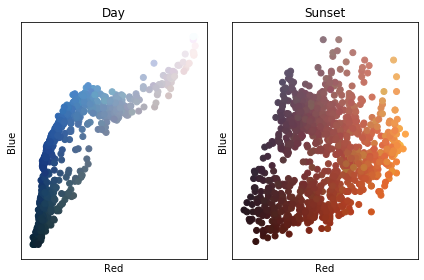

In [18]:
#plot them in the RB (red-blue) plane to see the pixels of what color we actually sampled:
plt.subplot(1, 2, 1)
plt.scatter(Xs[:, 0], Xs[:, 2], c=Xs)
#plt.axis([0, 1, 0, 1])
plt.xlabel('Red')
plt.ylabel('Blue')
plt.xticks([])
plt.yticks([])
plt.title('Day')

plt.subplot(1, 2, 2)

plt.scatter(Xt[:, 0], Xt[:, 2], c=Xt)
#plt.axis([0, 1, 0, 1])
plt.xlabel('Red')
plt.ylabel('Blue')
plt.title('Sunset')
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.show()

In [19]:
#we create an instance of the Monge-Kantorovich problem class and fit it on our images:
ot_emd = ot.da.EMDTransport()
ot_emd.fit(Xs=Xs, Xt=Xt)

In [29]:
#Note that we create an instance of ot.da.EMDTransport() class that provides features for doing domain adaptation 
#with OT and defines automatically the uniform empirical distributions (each pixel is a point having a 
#probability 1/1000) and the cost matrix (squared Euclidean distance between vectors of pixel coordinates) when we 
#call its fit() method. We can now “transport” one image onto another one using the coupling matrix as follows:
transp_Xt_emd = ot_emd.inverse_transform(Xt=sunset)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


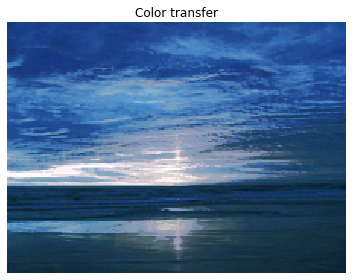

In [31]:
#The function inverse_transform() we’ve just called transports the sunset image to the daytime one using a 
#barycentric mapping: each transported pixel in the final result is an average of pixels from the sunset image 
#weighted by the corresponding values of the coupling matrix. You can do the same thing the other way around by 
#calling transform(Xs=day) too. 
I2t = mat2im(transp_Xt_emd, I2.shape)

plt.figure()
plt.imshow(I2t)
plt.axis('off')
plt.title('Color transfer')
plt.tight_layout()
plt.show()

In [55]:
img_mask = plt.imread('/Users/bananasacks/Desktop/Optimal Transport Internship/Hands-on guide to Python OT Part 2/mask.jpg')
img_mask = img_mask[:,:,:3] # remove alpha

img_source = plt.imread('/Users/bananasacks/Desktop/Optimal Transport Internship/Hands-on guide to Python OT Part 2/source.jpg')
img_source = img_source[:,:,:3] # remove alpha

img_target = plt.imread('/Users/bananasacks/Desktop/Optimal Transport Internship/Hands-on guide to Python OT Part 2/target.jpg')
img_target = img_target[:,:,:3] # remove alpha

In [56]:
nbsample = 500
off = (35,-15)
seamless_copy = blend(img_target, img_source, img_mask, reg=5, eta=1, nbsubsample=nbsample, offset=off, adapt='kernel')

AttributeError: module 'ot.da' has no attribute 'OTDA_mapping_kernel'

AttributeError: module 'ot.da' has no attribute 'OTDA_mapping_kernel'